In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [34]:
import plotly.graph_objs as gp
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True)
import matplotlib.cm as cm
import re

In [35]:
sns.set_style("darkgrid")
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR

In [36]:
dataset = pd.read_csv("CompleteDataset.csv", low_memory=False)
dataset.columns
dataset.head()

,Unnamed: 0,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
0,0,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,...,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0
1,1,L. Messi,30,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,93,93,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,...,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0
2,2,Neymar,25,https://cdn.sofifa.org/48/18/players/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,94,Paris Saint-Germain,https://cdn.sofifa.org/24/18/teams/73.png,...,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,84.0
3,3,L. Suárez,30,https://cdn.sofifa.org/48/18/players/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,92,92,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,...,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,88.0
4,4,M. Neuer,31,https://cdn.sofifa.org/48/18/players/167495.png,Germany,https://cdn.sofifa.org/flags/21.png,92,92,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
def conversion(money_str):
    notes = ''
    # Find the numbers and append
    for letter in money_str:
        if letter in '1234567890.':
            notes = notes + letter
        else:
            pass
    # Divide by 1000 to convert K to M for value
    if 'K' in money_str:
        return (float(notes)/1000)    
    else:
        return float(notes)

In [38]:
def wage_conversion(money_str):
    notes = ''
    # Find the numbers and append
    for letter in money_str:
        if letter in '1234567890.':
            notes = notes + letter
        else:
            pass
    
    return float(notes)

In [39]:
def convert_attributes(number_str):
    if type(number_str) == str:
        if '+' in number_str:
            return float(number_str.split('+')[0])
        elif '-' in number_str:
            return float(number_str.split('-')[0])
        else:
            return float(number_str)

In [40]:
#Data Conversion
dataset['Wage'] = dataset['Wage'].apply(wage_conversion) # Units = K
print(dataset['Wage'][-10:].dtype)
dataset['Value'] = dataset['Value'].apply(conversion) # Units = M
print(dataset['Value'][-10:].dtype)

dataset['Remaining Potential'] = dataset['Potential'] - dataset['Overall']

dataset['Preferred Position'] = dataset['Preferred Positions'].str.split().str[0]

float64
float64


In [41]:
###Best 11 based on overall rating in fifa data set
def formation_best_squad(position):
    dataset_copy = dataset.copy()
    store = []
    for i in position:
        store.append([i,dataset_copy.loc[[dataset_copy[dataset_copy["Preferred Position"] == i]["Overall"].idxmax()]]['Name'].to_string(index = False), dataset_copy[dataset_copy['Preferred Position'] == i]['Overall'].max()])
        dataset_copy.drop(dataset_copy[dataset_copy['Preferred Position'] == i]['Overall'].idxmax(), inplace = True)
    #return store
    return pd.DataFrame(np.array(store).reshape(11,3), columns = ['Position', 'Player', 'Overall']).to_string(index = False)

In [42]:
# 4-3-3
formation433 = ['GK', 'LB', 'CB', 'CB', 'RB', 'LM', 'CDM', 'RM', 'LW', 'ST', 'RW']
print ('4-3-3')
print (formation_best_squad(formation433))

4-3-3
Position            Player Overall
      GK          M. Neuer      92
      LB           Marcelo      87
      CB      Sergio Ramos      90
      CB      G. Chiellini      89
      RB          Carvajal      84
      LM        C. Eriksen      87
     CDM          T. Kroos      90
      RM      K. De Bruyne      89
      LW            Neymar      92
      ST Cristiano Ronaldo      94
      RW          L. Messi      93


In [43]:
#3-5-2
formation352 = ['GK', 'LWB', 'CB', 'RWB', 'LM', 'CDM', 'CAM', 'CM', 'RM', 'LW', 'RW']
print ('3-5-2')
print (formation_best_squad(formation352))

3-5-2
Position       Player Overall
      GK     M. Neuer      92
     LWB      D. Rose      82
      CB Sergio Ramos      90
     RWB    K. Walker      83
      LM   C. Eriksen      87
     CDM     T. Kroos      90
     CAM     Coutinho      86
      CM     N. Kanté      87
      RM K. De Bruyne      89
      LW       Neymar      92
      RW     L. Messi      93


In [44]:
##4-2-3-1
formation4231=['GK','LB','CB','CB','RB','CDM','CDM','LM','CAM','RM','ST']
print('4-2-3-1')
print(formation_best_squad(formation4231))
##potential against overall rating based on age parameter
##basic visualization

4-2-3-1
Position            Player Overall
      GK          M. Neuer      92
      LB           Marcelo      87
      CB      Sergio Ramos      90
      CB      G. Chiellini      89
      RB          Carvajal      84
     CDM          T. Kroos      90
     CDM         L. Modrić      89
      LM        C. Eriksen      87
     CAM          Coutinho      86
      RM      K. De Bruyne      89
      ST Cristiano Ronaldo      94


In [45]:
dataset_potential = dataset.groupby(['Age'])['Potential'].mean()
dataset_overall = dataset.groupby(['Age'])['Overall'].mean()

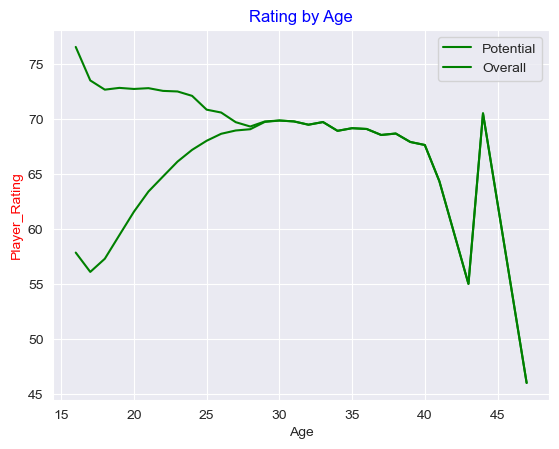

In [46]:
dataset_summary = pd.concat([dataset_potential, dataset_overall], axis=1)

ax = dataset_summary.plot(color='green')
ax.set_ylabel('Player_Rating',color='red')
ax.set_title('Rating by Age',color='blue')
plt.show()

In [47]:
###Top potential low rated players 
dataframe=dataset
dataframe['growth']=dataframe['Potential']-dataframe['Overall']
high_potential=dataframe[['Name','Overall','growth','Club','Preferred Positions']]
Top_Growths=high_potential.sort_values(by=['growth','Overall'],ascending=False)
print(Top_Growths[:10])

                   Name  Overall  growth               Club  \
11397          A. Gomes       64      26  Manchester United   
17123        C. Gregory       54      26         Shrewsbury   
17950           D. Amos       48      26   Doncaster Rovers   
17961  J. Latibeaudiere       47      26    Manchester City   
17515         M. Cooper       52      25    Plymouth Argyle   
17849      S. Sessegnon       50      25             Fulham   
15103         R. Nelson       59      24            Arsenal   
15837         J. Romero       58      24   Atlético Tucumán   
16374       L. Plogmann       57      24   Werder Bremen II   
17025         L. Pintor       54      24  Stade Brestois 29   

      Preferred Positions  
11397       CM RW LW CAM   
17123                 GK   
17950              LM LB   
17961                 CB   
17515                 GK   
17849              CB RB   
15103                 RM   
15837                 ST   
16374                 GK   
17025                 ST  

In [48]:
####Top 20 players
Top=dataset[['Name','Age','Preferred Positions','Overall']]
Top_20=Top.sort_values(by=['Overall'],ascending=False)
print(Top_20[:20])

                 Name  Age Preferred Positions  Overall
0   Cristiano Ronaldo   32              ST LW        94
1            L. Messi   30                 RW        93
2              Neymar   25                 LW        92
3           L. Suárez   30                 ST        92
4            M. Neuer   31                 GK        92
5      R. Lewandowski   28                 ST        91
6              De Gea   26                 GK        90
7           E. Hazard   26                 LW        90
8            T. Kroos   27             CDM CM        90
9          G. Higuaín   29                 ST        90
10       Sergio Ramos   31                 CB        90
15            G. Bale   27                 RW        89
18          G. Buffon   39                 GK        89
17       G. Chiellini   32                 CB        89
16          S. Agüero   29                 ST        89
13         A. Sánchez   28        RM LW ST LM        89
14          L. Modrić   31             CDM CM   

In [49]:
#######Machine Learning

mldf=dataset[['Name','Value','Overall','Age','Finishing']]


##To remove non-numeric values in Finishing column

def numeric_values(s):
    try:
        n = int(s)
        return (1 <= n and n <= 99)
    except ValueError:
        return False

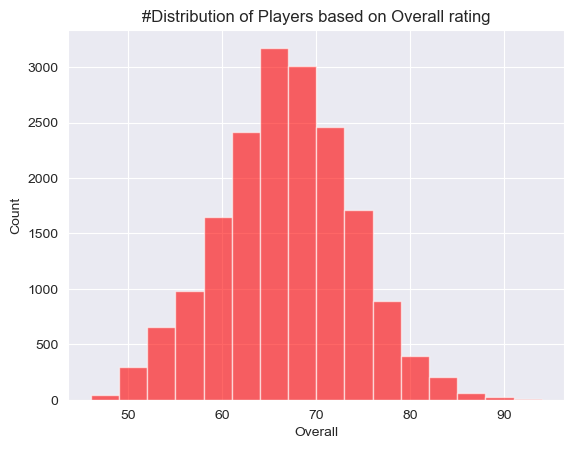

In [50]:
#remove not valid entries for Finishing
mldf = mldf.loc[mldf['Finishing'].apply(lambda x: numeric_values(x))]
 
#now we can define Finishing as integers
mldf['Finishing'] = mldf['Finishing'].astype('int')

####Distribution of players 
plt.hist(dataset.Overall, bins=16, alpha=0.6, color='r')
plt.title("#Distribution of Players based on Overall rating")
plt.xlabel("Overall")
plt.ylabel("Count")
 
plt.show()

Mean squared error using linear regression: 29.02


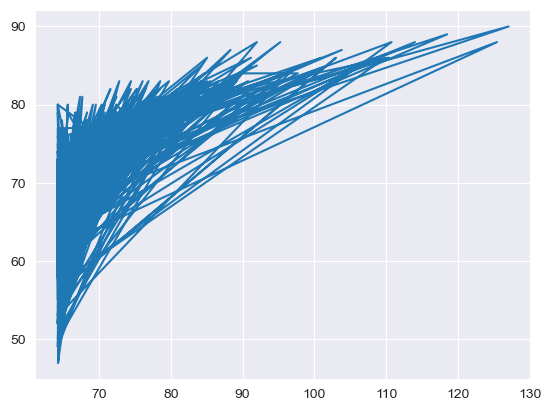

In [51]:
##Machine Learning(Linear regression)
##Data Slicing
##Dividing data using model selection 
from sklearn.model_selection import train_test_split
 
train, test = train_test_split(mldf, test_size=0.20, random_state=99)
 
xtrain = train[['Value']]
ytrain = train[['Overall']]
 
xtest = test[['Value']]
ytest = test[['Overall']]

regression = linear_model.LinearRegression()
regression.fit(xtrain, ytrain)

#Predicting y using test data set
y_predictions = regression.predict(xtest)

print("Mean squared error using linear regression: %.2f" % mean_squared_error(ytest, y_predictions))
plt.plot(y_predictions,ytest)
plt.show()

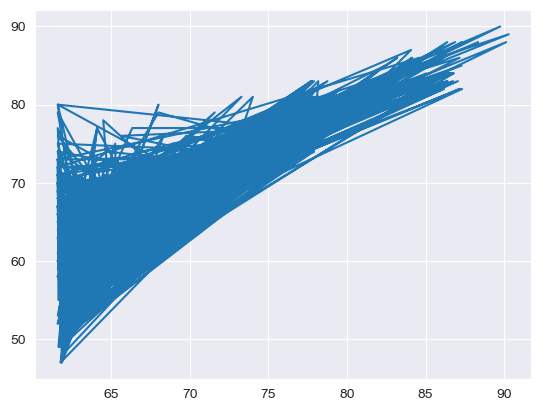

Mean squared error using svr: 13.85


In [52]:
####Using another model support vector regression (radial basis function for non linear problems) 
SVR_dataset = SVR(kernel='rbf', gamma=1e-3, C=100, epsilon=0.1)
SVR_dataset.fit(xtrain, ytrain.values.ravel())

radial_function = SVR_dataset.predict(xtest)
plt.plot(radial_function,ytest)
plt.show()

print("Mean squared error using svr: %.2f" % mean_squared_error(ytest, radial_function))